# Generation of families of explicit finite difference schemes for derivatives of any order of chosen LTE

In [1]:
cd pyfiles/

/home/dsirajud/Work/IPython-notebooks/Generation of families of explicit finite difference schemes for derivatives of any order of chosen LTE/pyfiles


The usual way to motivate finite difference methods of a given derivative $d$ at a local truncation error of order $N$ is to do so by small, but specific, examples. These quests aim to achieve a chosen order $N$ (e.g. $N = 2$) by inviting the reader to juxtapose several Taylor expansions of $f(x_i+ j\Delta x)$ where $(i,j)\in\mathbb{Z}\times\mathbb{Z}$. The examples are simple enough that it is easy to see how to add two or three of such expansions at different grid points (e.g. $j = 0, 1, 2$) so that higher order terms exactly cancel, producing a higher order $LTE$.

For example, the following slide from a course lecture shows how this is done easily for a simple case (LTE $O(\Delta x^2)$, or $N = 2$) for the first derivative, where the common shorthand $f(x_i + j\Delta x) \equiv f(x_{i + j})$ is used

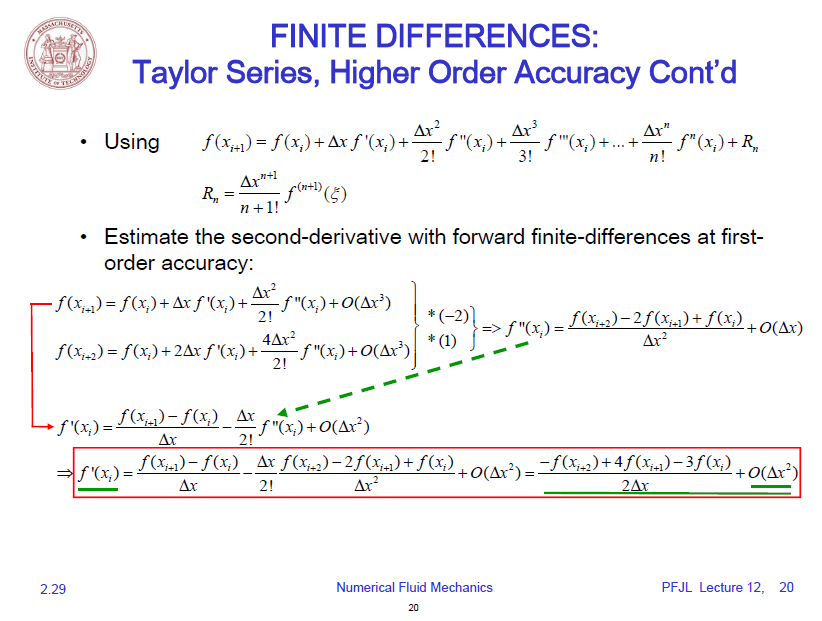

In [2]:
from IPython.display import Image
Image(filename='../fig/test.png')

[entire slide set is publicly available to download at: http://ocw.mit.edu/courses/mechanical-engineering/2-29-numerical-fluid-mechanics-fall-2011/lecture-notes/MIT2_29F11_lect_12.pdf ]


In general, our goal is to seek the appropriate linear combination of functions $f(x_i + j\Delta x)$ that approximate the derivative of the desired order with the required local truncation error at a point $x_i$. In particular, each grid index $j$ furnishes a label for each unique weight $C_j$ needed for the cancellation of order terms up to the local truncation error seeked. 

We obtain a starting point by considering the Taylor expanstion of a function at the $(i+j)$th grid point, $f(x_i + j\Delta x)$ where $\Delta x$ is the grid spacing.

$$f(x_i + j\Delta x) = \sum_{n = 0}^{d-1} j^n \frac{(\Delta x)^n}{n!} \frac{d^n f(x_i)}{dx^n} + j^d \frac{(\Delta x)^d}{d!}\frac{d^d f(x_i)}{dx^d} + \sum_{m = d + 1}^{N-1} j^m \frac{(\Delta x)^{m}}{m!}\frac{d^m f(x_i)}{dx^m} + O(\Delta x^N)$$

There exists a unique linear combination of $j\in [j_{min}, j_{max}]$ such expansions that cause all order terms to vanish up to order $N-1$ which leaves only the desired derivative and a remainder term of order $O(\Delta x^N)$. That is, weighting the left-hand side of the above by  coefficients $\{C_j\}$ and summing over a sufficient size stencil $\{j\}$, the above equation amounts to

\begin{eqnarray*}
\sum_{j = j_{min}}^{j_{max}} C_j f(x_i + j\Delta x) & = & 0 + \sum_{j = j_{min}}^{j_{max}} C_j j^d\frac{(\Delta x)^d}{d!}\frac{d^d f(x_i)}{d x^d}  + 0 + O(\Delta x^N) \\
\left(\sum_{j = j_{min}}^{j_{max}} C_j j^d\right)\frac{(\Delta x)^d}{d!}\frac{d^d f(x_i)}{d x^d} & = & \sum_{j = j_{min}}^{j_{max}} C_j f(x_i + j\Delta x) + O(\Delta x^N) \\
\frac{(\Delta x)^d}{d!}\frac{d^d f(x_i)}{d x^d} & = &  \frac{\sum_{j = j_{min}}^{j_{max}} C_j f(x_i + j\Delta x)}{\left(\sum_{j = j_{min}}^{j_{max}} C_j j^d\right)} + \frac{1}{\left(\sum_{j = j_{min}}^{j_{max}} C_j j^d\right)}O(\Delta x^N)
\end{eqnarray*}

or,

$$\frac{(\Delta x)^d}{d!}\frac{d^d f(x_i)}{d x^d}  =  \sum_{j = j_{min}}^{j_{max}} c_j f(x_i + j\Delta x) + O(\Delta x^N)$$

where $c_j = C_j / (\sum_j C_j j^d)$ are unknown constants at this juncture. In order to see the order achievable, it is transparent to represent the truncation term above as having an order $N = p + d$, where $p$ and $d$ correspond to the effective order of the LTE for the desired derivative of order $d$. Thus, the above is equivalent to

\begin{eqnarray*}
\frac{d^d f(x_i)}{dx^d} & = &\frac{d!}{(\Delta x)^d}\sum_{i = i_{min}}^{i_{max}} c_j f(x_i + j\Delta x) + \frac{d!}{(\Delta x)^d}O(\Delta x^{p + d})\\
& = &\frac{1}{(\Delta x)^d}\sum_{j = j_{min}}^{i_{max}} w_jf(x_i + j\Delta x) + O(\Delta x^p)
\end{eqnarray*}

In the final step we have chosen to represent the product $w_j \equiv c_j d!$, as it is the set $\{w_j\}$ that are commonly reported in literature and known as <i>difference coefficients</i>. In order to cause the order terms to cancel up to and including order $N - 1 = p + d - 1$, we expand the Taylor series up to this order to obtain constraining equations for the weights. 

\begin{eqnarray*}
\frac{d^d f(x_i)}{dx^d} & = &\frac{1}{(\Delta x)^d}\sum_{j = j_{min}}^{i_{max}} w_j f(x_i + j\Delta x) + O(\Delta x^p) \\
 & = &\frac{1}{(\Delta x)^d}\sum_{j = j_{min}}^{i_{max}} w_j\sum_{m = 0}^{p + d - 1} j^m \frac{(\Delta x)^m}{m!} + O(\Delta x^p) \\
\frac{d^d f(x_i)}{dx^d} & = & \frac{1}{(\Delta x)^d}\sum_{m = 0}^{p + d - 1}\left(\sum_{j = j_{min}}^{i_{max}} w_j j^m\right) \frac{(\Delta x)^m}{m!} + O(\Delta x^p) 
\end{eqnarray*}

Thus, what is required for all $p + d$ order terms to vanish is that the prefactor 

$$\boxed{\text{order conditions}}: \, \sum_{j = j_{min}}^{j_{max}} w_j j^m  = \begin{cases} 
      1 & m = d \\
      0 & 0 \leq m \leq p + d - 1, m \neq d
   \end{cases}, \quad m = 0, 1, \ldots , p + d - 1$$

The formulation presents $j_{max} - j_{min} + 1$ unknown weights $w_j$ and $p + d$ equations. In general, there is no unique solution, but a family of solutions where free parameters may be chosen or otherwise optimized. If we choose to concentrate only on <i>explicit</i> differencing schemes that have unique solutions, the we require

$$\boxed{\text{Stencil size}}:\,  j_{max} - j_{min} + 1 = p + d \, , \qquad \text{uniqueness condition for explicit schemes}$$

As an example, we can prove the above scheme from the specific example just above ($p = 2$, $d = 1$, i.e. stencil size $= p + d = 3$, $0 \leq m < p + d$) is consistent with this general form by choosing $j_{min} = 0, j_{max} = 2$ and weights $w_0 = -3/2, w_1 = 4/2, w_2 = -1/2$, by writing the order constraints above, where the right-hand side is nonzero only for $m = d = 1$:

\begin{eqnarray*}
m = 0: \sum_{j = 0}^2 w_j j^0 & = & w_0(0^0) + w_1(1^0) + w_2(2^0) = -\tfrac{3}{2}(1) + \tfrac{4}{2}(1) - \tfrac{1}{2}(1) = 0 \\
&& \\[1em]
m = 1: \sum_{j = 0}^2 w_j j^1 & = & w_0(0^1) + w_1(1^1) + w_2(2^1) = -\tfrac{3}{2}(0) + \tfrac{4}{2}(1) - \tfrac{1}{2}(2) = 1 \\
&& \\[1em]
m = 2: \sum_{j = 0}^2 w_j j^2 & = & w_0(0^2) + w_1(1^2) + w_2(2^2) = -\tfrac{3}{2}(0) + \tfrac{4}{2}(1) - \tfrac{1}{2}(4) = 0
\end{eqnarray*}

The constraints can be cast conveniently in matrix form:

$$\left(\begin{array}{c c c}
0^0 & 1^0 & 2^0 \\
0^1 & 1^1 & 2^1 \\
0^2 & 1^2 & 2^2 \\
\end{array} \right)
\left( \begin{array}{c}
w_0 \\
w_1 \\
w_2
\end{array} \right)
= \left(\begin{array}{c}
0 \\
1 \\
0
\end{array} \right)$$

or, in general

$$\underbrace{\left( \begin{array}{c c c c c c }
j_{min}^0 & (j_{min}+1)^0 & \ldots &  \ldots & (j_{max} - 1)^0 & j_{max}^0 \\
j_{min}^1 & (j_{min}+1)^1 & \ldots &  \ldots & (j_{max} - 1)^1 & j_{max}^1  \\
j_{min}^2 & (j_{min}+1)^2 & \ldots &  \ldots & (j_{max} - 1)^2 & j_{max}^2  \\
\vdots &   \vdots & & & \vdots & \vdots \\
\vdots &   \vdots & & & \vdots & \vdots \\
\vdots &   \vdots & & & \vdots & \vdots \\
\vdots &   \vdots & & & \vdots & \vdots \\
j_{min}^{p + d - 2} & (j_{min}+1)^{p + d - 2} & \ldots &  \ldots & (j_{max} - 1)^{p + d - 2} & j_{max}^{p + d - 2}  \\
j_{min}^{p + d - 1} & (j_{min}+1)^{p + d - 1} & \ldots &  \ldots & (j_{max} - 1)^{p + d - 1} & j_{max}^{p + d - 1}  \\
\end{array} \right)}_{\underline{\underline{J}}_{N \times N}}
\underbrace{\left( \begin{array}{c}
w_{j_{min}} \\
w_{j_{min}+1} \\
w_{j_{min}+2} \\
\vdots \\
\vdots \\
\vdots \\
w_{j_{max} - 2} \\
w_{j_{max} - 1} \\
w_{j_{max}} 
\end{array} \right)}_{\underline{w}_{N\times 1}}
= 
\underbrace{\left( \begin{array}{c}
0 \\
0 \\
0 \\
\vdots \\
1 \\
\vdots  \\
0 \\
0 \\
0 \end{array} \right)}_{\underline{\delta}_{N\times 1, md}} $$

so the following can be written:

$$\boxed{\underline{\underline{J}}_{N\times N} \underline{w}_{N\times 1} = \underline{\delta}^{md}_{N\times 1}}\, , \qquad \text{where } N = p + d$$

It is noted that the matrix $\underline{\underline{J}}$ is a Vandermonde matrix involving grid indices. While perhaps not anticipated, it is nontheless not surprising to see result. The paradigmatic context for a Vandermonde matrix arises for least squares fitting or Lagrange interpolating polynomials. It is well known that differentiating interpolants of a function produces finite difference schemes of varying degrees of accuracy. What is unclear in that formulation is how the stencil size (how many points are interpolated exactly) affects the order of the local truncation error. The development above answers this question, the larger the stencil size (the more points that are interpolated exactly), the higher order the truncation error will be. What is more, it informs a stencil of size $p + d$ produces a truncation error of $O(\Delta x^p)$. Even if this knowledge were to be gleaned a priori it remains impractical and labor intensive to assemble interpolating polynomials with the required stencil size for each case and differentiate as many times as needed. The above prescription permitted us to clearly understand the size of the stencil needed for a given derivative order $d$ for a desired truncation order $p$, and allows for efficient calculation of the resulting difference coefficients $w_i$, an implementation that can be automated, so we have obtained a result with clear advantage and in doing so have discovered more telling information than would be seen by toying with Lagrange interpolating polynomials. Though admittedly, trends would have been observable, satisfying information would not be obtainable.

The delta-function vector on the right-hand side is defined as:

$$\underline{\delta}^{md}_{N\times 1} = (\underbrace{\phantom{000}0\phantom{000}}_{m = 0}, \underbrace{\phantom{000}0\phantom{000}}_{m = 1}, \underbrace{\phantom{000}0\phantom{000}}_{m = 2}, \ldots , \underbrace{\phantom{000}1\phantom{000}}_{m = d}, \ldots, \underbrace{\phantom{000}0\phantom{000}}_{m = N - 3}, \underbrace{\phantom{000}0\phantom{000}}_{m = N - 2}, \underbrace{\phantom{000}0\phantom{000}}_{m = N - 1})^T$$

The solution to this matrix equation gives the weights $\{w_j\}$, $j = j_{min}, j_{min} + 1, \ldots, j_{max}$ for an explicit finite difference scheme estimating a derivative of order $d$ with a local truncation error $p$. Its stencil size is $p + d$, so that higher accuracy is seento come at the cost of expanding the stencil sign. For rapidly varying functions, it is understood that convergence cannot be expected for sufficiently coarse grids (however, if the grid is refined too significantly, then we must also be wary of the competition of the error drop off on the LTE as compared to the numerical error buildup. When the grid becomes too fine the estimation using a given scheme can become far worse due to the accumulation of an error term that is on the order of the machine error but which scales with an inverse power coresponding to the derivative itself).

Note, in implementing this routine, it is of course discouraged to actually pursue finding the inverse of the $\underline{\underline{J}}$ matrix, but rather to solve through an efficient matrix routine (e.g. factorization methods). In Python, the NumPy package numpy.linalg.solve can be used to efficiently solve the problem.


A function find_weights(*args) is simple to program for a given $\text{stencil}$, order of derivative $dn$, and a desired local truncation error $p$. Note, it is in the $\text{stencil}$ that we can choose $j_{min}$ and $j_{max}$ grid indices.

In [3]:
def find_weights(_dn, _p, _stencil):
    """Assemble and solve the matrix system characterizing
    the explicit scheme of LTE order p for the derivative
    order dn according to stencil provided

    _ indicates variable is restricted to scope of this function

    inputs:
    _dn -- (int) order of derivative
    _p -- (int) order of truncation error desired
    _stencil -- (list, int) list of integers i in x + i(dx)
         the choice of scheme (asymmetric (forward, backward,
         unequal sampling on each side) vs. symmetric (centered)
         will determine this range), A[i,:] = x ** i

    outputs:
    _w -- (ndarray, ndim=2) finite difference coefficients from solving AC = b
    _stencil -- (list, int) the integer i in (x + ih) the weight applies to
         i.e. returns the input
    """
    from math import factorial
    import numpy as np
    import numpy.linalg as LA

    eps = np.finfo(np.float).eps # smallest floating point number
    _stencil = np.array(_stencil)
    A = np.zeros([_dn+_p, _dn+_p])
    b = np.zeros(len(_stencil))

    for i in range(_dn+_p):
        A[i,:] = _stencil ** i

        if i == _dn:
            b[i] = 1.
        else:
            b[i] = 0.

    _w = factorial(_dn)*LA.solve(A,b) # = w[0], w[1], .., w[p+d-1]
    _w[np.abs(_w) < 2*eps] = 0 # zero out any weight close (factor of 2) to machine epsilon
    return _w, _stencil

For example, we can recover the same case we have been using above, $dn = 1$, $p = 2$, for a forward difference, i.e. $\text{stencil size} = p + d + 3 \Rightarrow j_{min} = 0, j_{max} = 2 \Rightarrow \text{stencil} = \{0, 1, 2\}$ 

In [4]:
w, stencil = find_weights(1, 2, [0,1,2])
for gridpoint, weight in zip(stencil, w):
    print "(grid point, weight): = (%s, %s) " % (str(gridpoint), str(weight))

(grid point, weight): = (0, -1.5) 
(grid point, weight): = (1, 2.0) 
(grid point, weight): = (2, -0.5) 


Thus, the script calculates the same weights $w_0 = -3/2, w_1 = 4/2, w_2 = -1/2$ as seen above.

We can automate the procedure to loop through all possible stencils (i.e. amounts to considering different $j_{min}$ and $j_{max}$) to generate the family of finite difference schemes for a particular $dn$ at a desired LTE order $p$. This is done in the script 

pyfiles/bin/generate_tables_of_finite_difference_schemes_for_a_given_LTE.py

The outputs are .dat files of two types and whose filenames are so-named: 

<ol>
<li> <u>non-decorated</u>: a table generated in a form that another reader function knows about. This is used to stack the scheme in a matrix.</li>
<li> <u>decorated</u>: a human reader-friendly formatted table
</ol>

For example, if we wish to examine a case for $dn = 2$, $p = 2$, we can run the script

In [5]:
cd bin

/home/dsirajud/Work/IPython-notebooks/Generation of families of explicit finite difference schemes for derivatives of any order of chosen LTE/pyfiles/bin


In [6]:
import generate_tables_of_finite_difference_schemes_for_a_given_LTE

generate_tables_of_finite_difference_schemes_for_a_given_LTE.main(LTE = 2, dn = 2)

Produces two files that are stored in pyfiles/etc (location may be changed in the optional kwarg rel_path = './../etc/'), the decorated table is given below:

alternatively, this may be generated from the command line:

Here, there exists no central scheme since the stencil is even. It can be confirmed from literature (e.g. Fornberg, Bengt. Generation of finite difference formulas on arbitrarily spaced grids, ...) that these weights for the forward differences agree. For the other schemes (whose naming can be understood by comparing with their stencils), a straightforward calculation can prove these agree.

Tables corresponding to a range of derivatives for a given LTE can be generated using the pyfiles/bin/generate_tables_of_finite_difference_schemes_for_a_given_LTE_for_range_of_derivatives.py via

where LTE is the chosen local truncation order, dn_min and dn_max communicate the range of derivatives desired, i.e. dn_min <= dn <= dn_max, or interactively

In [7]:
import generate_tables_of_finite_difference_schemes_for_a_given_LTE_for_range_of_derivatives

generate_tables_of_finite_difference_schemes_for_a_given_LTE_for_range_of_derivatives.main(LTE = 2, dn_min = 1, dn_max = 1)

for example, reproduces the special case of LTE = 2, dn = 1. Changing the bounds dn_min and dn_max would permit tables to be generated for all such derivatives and stored in pyfiles/etc (or wherever specified through kwarg rel_path = './../etc/')

## Generation of finite difference tables required for a given LTE on high order CS

Regarding high order CS, the accuracy requirement for each correction relies on the derivative coefficient $d_{i,\ell}^n$ being of a given LTE $O(\Delta x^{N+1})$, the form of this coefficient reduces the order requirement on each derivative as follows:

$$\text{LTE}[d_{i,\ell}^n]_{\ell\geq 1} = \text{LTE}\left[ (\Delta x)^{\ell} \frac{\partial^{\ell} f^n}{\partial x^q} \right] = O(\Delta x^N) \Rightarrow \boxed{\text{LTE}\left[\frac{\partial^{\ell} f}{\partial x^{\ell}}\right] = O(\Delta x^{N - \ell})}$$

The reader is invited to review the preliminary document at dsirajud/Preliminary-examination/ for more details.

Thus, each data table for the family of FD schemes for each derivative of their required LTE can be generated by calling the above script as follows (for the example of a CS method with LTE of order $N + 1 = 6$, we require $LTE[d_{i,\ell}^n] = O(\Delta x^5)$ since each correction is multiplied by $\Delta x^1$ at least (which produces the strictest requirement on the order for all derivatives):

In [9]:
import generate_tables_of_finite_difference_schemes_for_a_given_LTE

N = 5
for dn in range(1,N):
    generate_tables_of_finite_difference_schemes_for_a_given_LTE.main(LTE = N-dn, dn = dn)

Note, that as required the derivative number "f1", "f2", ..., and the LTE ("LTE_4", "LTE_3", ...) respectively add up to 5 for each file name, which is the $LTE - 1 = 5$ as needed.